## Importing Lib

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

## Function to load dataset from CSV or Excel file

In [2]:
def load_dataset(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please provide a CSV or Excel file.")

## Function to preprocess data

In [3]:
def preprocess_data(data):
    # check percentage of missing values
    missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100

    # choose missing data strategy based on missing percentage
    if missing_percentage < 5:
        missing_data_strategy = 'mean'
    else:
        missing_data_strategy = 'remove'

    # handle missing values
    if data.isnull().sum().sum() > 0:
        if missing_data_strategy == 'remove':
            data = data.dropna()  
        elif missing_data_strategy == 'mean':
            imputer = SimpleImputer(strategy='mean')  
            data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        elif missing_data_strategy == 'median':
            imputer = SimpleImputer(strategy='median')  
            data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        elif missing_data_strategy == 'mode':
            imputer = SimpleImputer(strategy='most_frequent')  
            data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        else:
            raise ValueError("Invalid missing_data_strategy. Supported options are 'remove', 'mean', 'median', 'mode'.")

    # encode categorical variables if present
    for column in data.select_dtypes(include=['object']).columns:
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

    return data

## Function to select appropriate models based on learning task

In [4]:
def select_models(X_train, y_train):
    models = []
    if y_train is not None:  # Supervised learning task
        # Regression models
        models.append(("Linear Regression", LinearRegression()))
        models.append(("Random Forest Regressor", RandomForestRegressor()))
        # Classification models
        models.append(("Logistic Regression", LogisticRegression()))
        models.append(("Random Forest Classifier", RandomForestClassifier()))
        models.append(("KNeighbors Classifier", KNeighborsClassifier()))
        models.append(("Support Vector Classifier", SVC()))
    else:  # Unsupervised learning task
        models.append(("KMeans Clustering", KMeans(n_clusters=3)))
    return models

## Function to train and evaluate models

In [5]:
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models:
        model_result = {}
        model_result["Name"] = name
        if y_train is not None:  # Supervised learning task
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            if isinstance(model, (LinearRegression, RandomForestRegressor)):
                model_result["Metric"] = "R^2 Score"
                model_result["Score"] = r2_score(y_test, y_pred)
            elif isinstance(model, (LogisticRegression, RandomForestClassifier, KNeighborsClassifier, SVC)):
                model_result["Metric"] = "Accuracy Score"
                model_result["Score"] = accuracy_score(y_test, y_pred)
                model_result["Confusion Matrix"] = confusion_matrix(y_test, y_pred)
        else:  # Unsupervised learning task
            if isinstance(model, KMeans):
                model.fit(X_train)
                silhouette_avg = silhouette_score(X_train, model.labels_)
                model_result["Metric"] = "Silhouette Score"
                model_result["Score"] = silhouette_avg
            else:
                model_result["Metric"] = "N/A"
                model_result["Score"] = "N/A"
        results.append(model_result)
    return results

# Function to visualize data

In [6]:
def visualize_data(data):
    # Example: Pairplot for visualization
    sns.pairplot(data)
    plt.show()


## Driver Code or Main Function

In [7]:
def main(file_path):
    # Load dataset
    dataset = load_dataset(file_path)

    # Basic data analysis and visualization
    print("Dataset Information:")
    print(dataset.info())
    print("\nDescriptive Statistics:")
    print(dataset.describe())
    visualize_data(dataset)

    # Preprocess data
    dataset = preprocess_data(dataset)

    # Split data into features and target variable (if available)
    if 'target_column' in dataset.columns:
        X = dataset.drop(columns=['target_column'])
        y = dataset['target_column']
    else:
        X = dataset
        y = None

    # Split data into training and testing sets for supervised learning
    if y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test = X, None
        y_train, y_test = None, None

    # Select models based on learning task
    models = select_models(X_train, y_train)

    # Train and evaluate models
    print("\nModel Evaluation:")
    results = train_and_evaluate_models(models, X_train, X_test, y_train, y_test)

    # Find the best performing model
    best_model = max(results, key=lambda x: x.get("Score", np.NINF))

    # Print results
    print("\nResults:")
    for result in results:
        print(f"Model: {result['Name']}, Metric: {result['Metric']}, Score: {result['Score']}")
        if result["Metric"] == "Accuracy Score":
            print("Confusion Matrix:")
            print(result["Confusion Matrix"])
    
    # Print best model
    print("\nBest Model:")
    print(f"Model: {best_model['Name']}, Metric: {best_model['Metric']}, Score: {best_model['Score']}")
    if best_model["Metric"] == "Accuracy Score":
        print("Confusion Matrix:")
        print(best_model["Confusion Matrix"])


## Execute the main function with the file path of your dataset

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  546 non-null    int64 
 1   price     546 non-null    int64 
 2   lotsize   546 non-null    int64 
 3   bedrooms  546 non-null    int64 
 4   bathrms   546 non-null    int64 
 5   stories   546 non-null    int64 
 6   driveway  546 non-null    object
 7   recroom   546 non-null    object
 8   fullbase  546 non-null    object
 9   gashw     546 non-null    object
 10  airco     546 non-null    object
 11  garagepl  546 non-null    int64 
 12  prefarea  546 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.6+ KB
None

Descriptive Statistics:
         rownames          price       lotsize    bedrooms     bathrms  \
count  546.000000     546.000000    546.000000  546.000000  546.000000   
mean   273.500000   68121.597070   5150.265568    2.965201    1.285714   
s

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

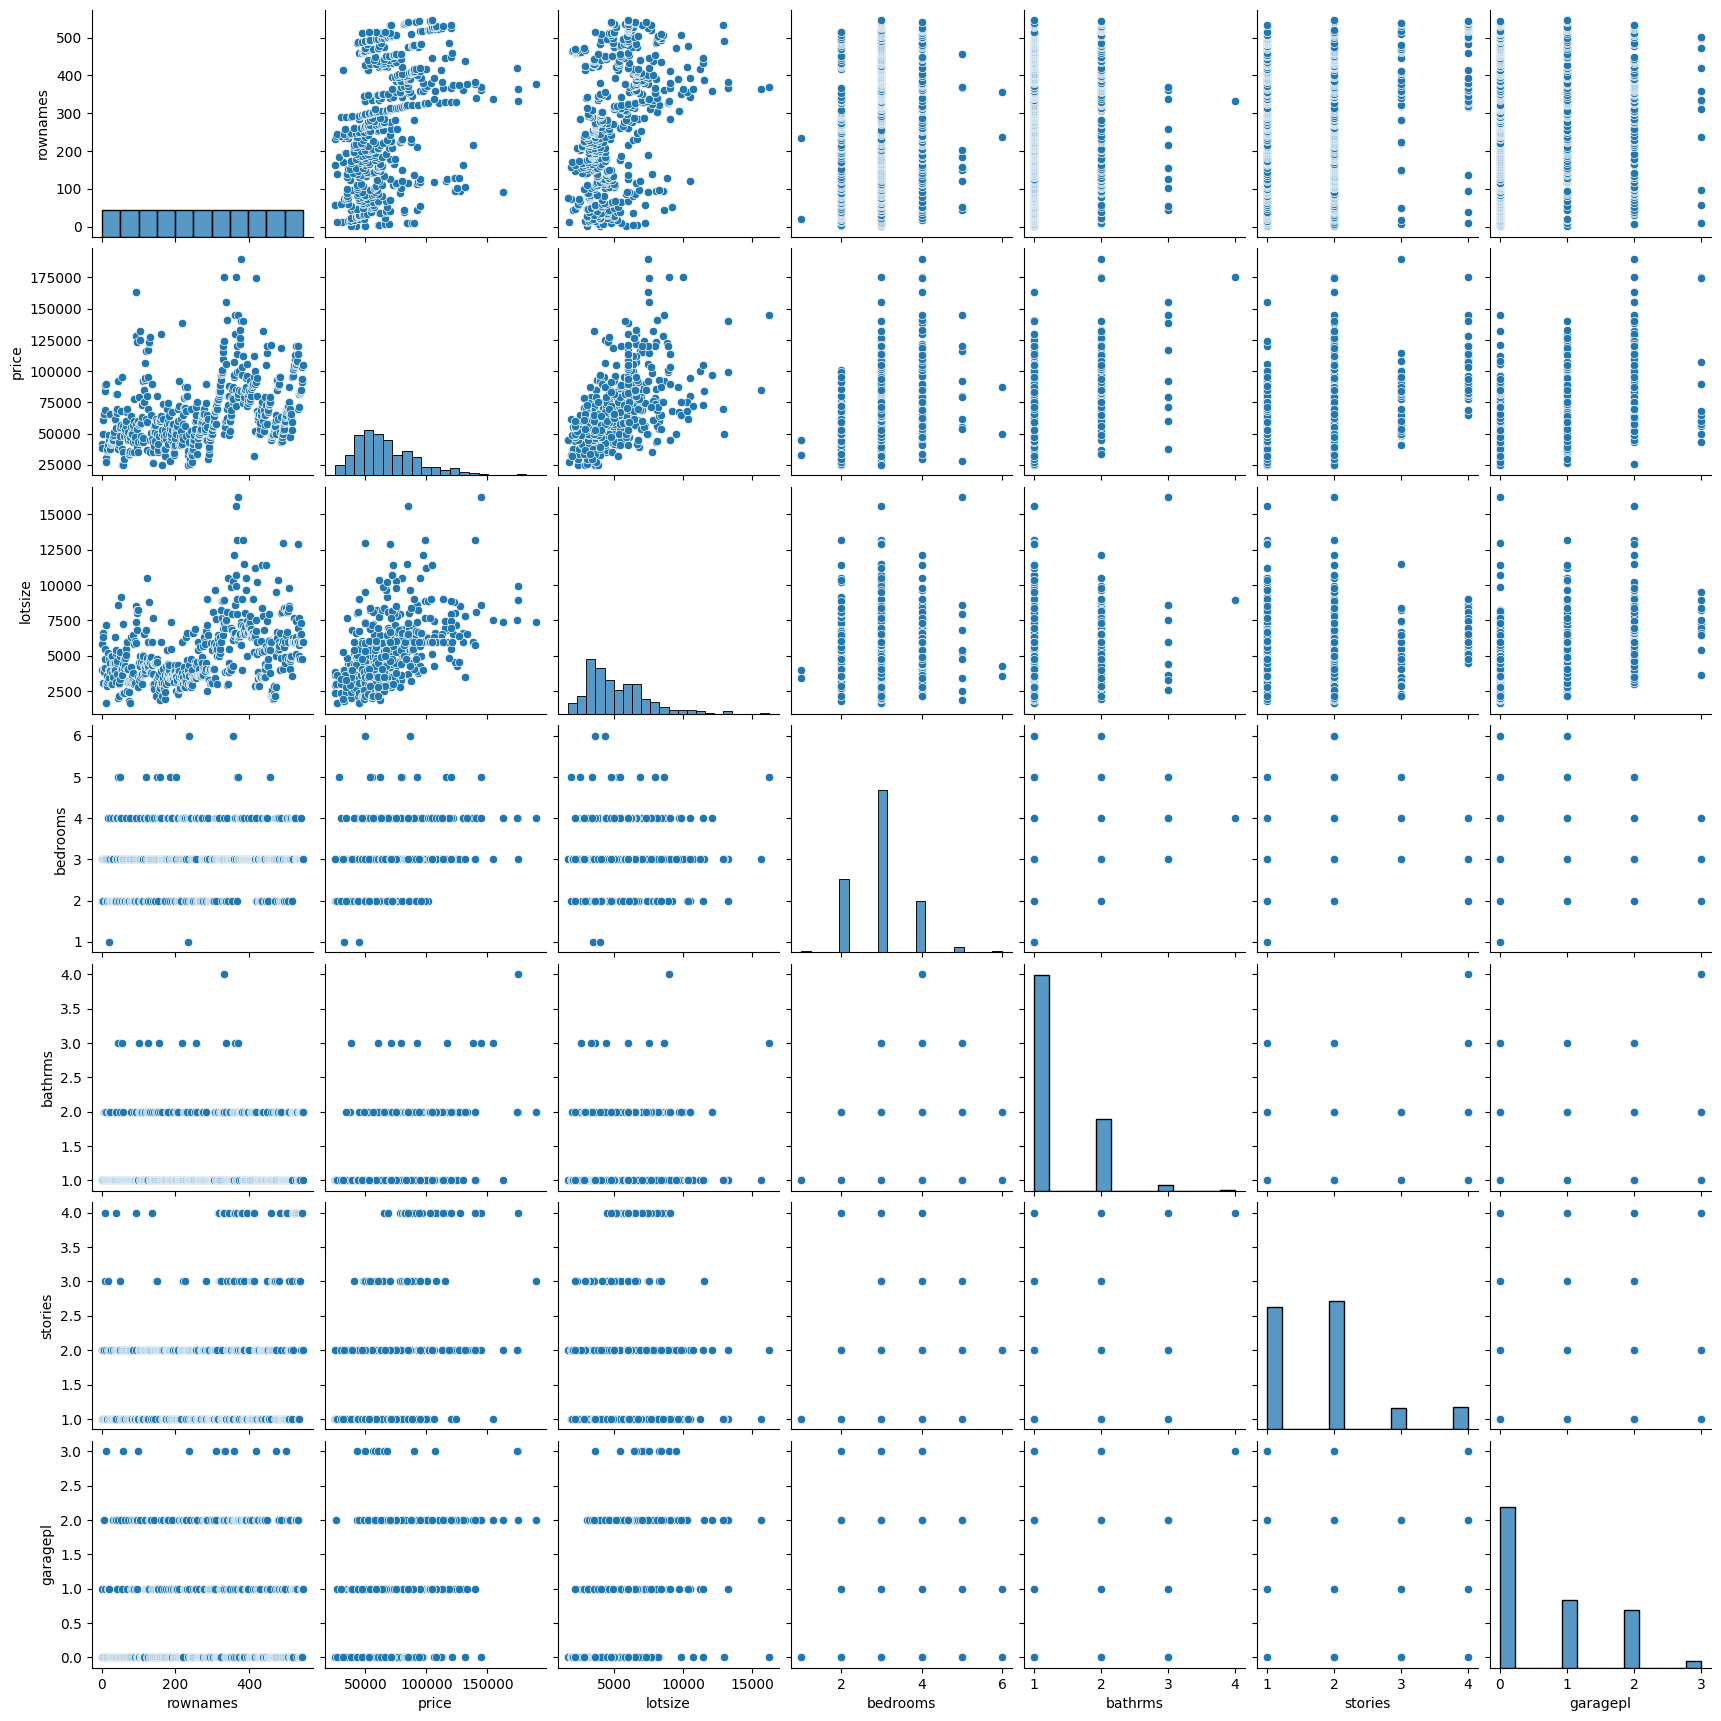


Model Evaluation:

Results:
Model: KMeans Clustering, Metric: Silhouette Score, Score: 0.5482831226371111

Best Model:
Model: KMeans Clustering, Metric: Silhouette Score, Score: 0.5482831226371111


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

In [8]:
if __name__ == "__main__":
    file_path = "Housing.csv"  # Update with your dataset file path
    main(file_path)
